In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [59]:
data = pd.read_csv("data.csv", index_col=0)
data.shape

(887379, 19)

In [3]:
data.columns

Index(['emp_length_int', 'home_ownership', 'income_category', 'annual_inc',
       'loan_amount', 'term', 'application_type', 'purpose',
       'interest_payments', 'interest_rate', 'grade', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region',
       'loan_condition', 'duracao_emprestimo_dias'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['application_type'] = le.fit_transform(data['application_type'])
data['income_category'] = le.fit_transform(data['income_category'])
data['grade'] = le.fit_transform(data['grade'])
data['region'] = le.fit_transform(data['region'])
data['home_ownership'] = le.fit_transform(data['home_ownership'])
data['term'] = le.fit_transform(data['term'])
data['purpose'] = le.fit_transform(data['purpose'])
data['interest_payments'] = le.fit_transform(data['interest_payments'])

In [61]:
data['loan_condition'] = [1 if x == 'Bad Loan' else 0 for x in data['loan_condition']]

In [6]:
data.head()

,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,interest_payments,interest_rate,grade,dti,total_pymnt,total_rec_prncp,recoveries,installment,region,loan_condition,duracao_emprestimo_dias
1,10.0,0,1,24000,5000,0,1,0,1,10.65,1,27.65,5861.071414,5000.00,0.00,162.87,3,0,1127
2,0.5,0,1,30000,2500,1,1,5,0,15.27,2,1.00,1008.710000,456.46,117.08,59.83,2,1,487
3,10.0,0,1,12252,2400,0,1,5,0,15.96,2,8.72,3003.653644,2400.00,0.00,84.33,1,0,913
4,10.0,0,1,49200,10000,0,1,2,0,13.49,2,20.00,12226.302210,10000.00,0.00,339.31,4,0,1127
5,1.0,0,1,80000,3000,1,1,2,1,12.69,1,17.94,3242.170000,2233.10,0.00,67.79,4,0,1492


In [62]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='loan_condition')
y = data['loan_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Modelo sem nenhum tratamento nos dados 

In [64]:
camadas = [
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
]

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("models/modelo.keras"),
]

epochs = 5
batch_size = 128
validation_split= 0.1

In [65]:
model = tf.keras.Sequential(camadas)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, 
                                      epochs=epochs, batch_size=batch_size, 
                                      validation_split=validation_split)

model.save("./models/model.keras")

c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/5
4992/4992 [==============================] - 70s 13ms/step - loss: 0.2100 - accuracy: 0.9399 - val_loss: 0.2134 - val_accuracy: 0.9476
Epoch 2/5
4992/4992 [==============================] - 62s 12ms/step - loss: 0.1871 - accuracy: 0.9479 - val_loss: 0.1933 - val_accuracy: 0.9492
Epoch 3/5
4992/4992 [==============================] - 61s 12ms/step - loss: 0.1832 - accuracy: 0.9485 - val_loss: 0.1777 - val_accuracy: 0.9493
Epoch 4/5
4992/4992 [==============================] - 62s 12ms/step - loss: 0.1815 - accuracy: 0.9488 - val_loss: 0.1773 - val_accuracy: 0.9491
Epoch 5/5
4992/4992 [==============================] - 64s 13ms/step - loss: 0.1804 - accuracy: 0.9490 - val_loss: 0.1777 - val_accuracy: 0.9496


### Resultados

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
model = tf.keras.models.load_model("./models/model.keras")

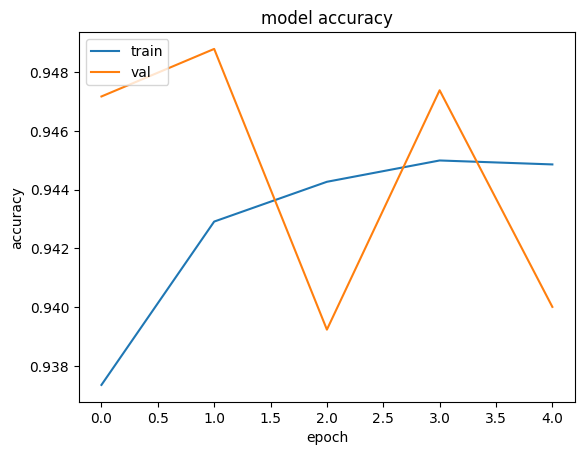

In [20]:
plt.plot(history_balanced.history['accuracy'])
plt.plot(history_balanced.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

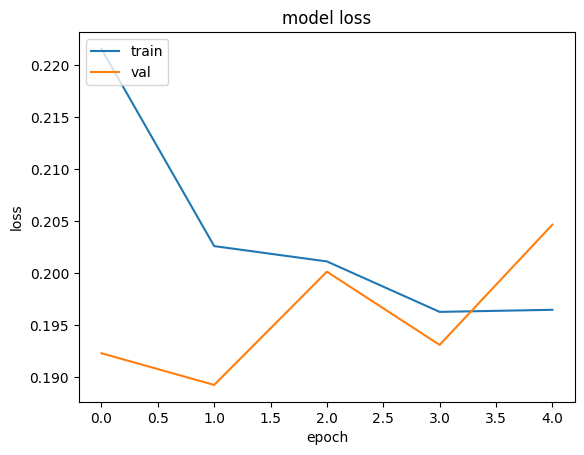

In [21]:
plt.plot(history_balanced.history['loss'])
plt.plot(history_balanced.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
y_pred_prob = model.predict(X_test)

5547/5547 [==============================] - 6s 1ms/step


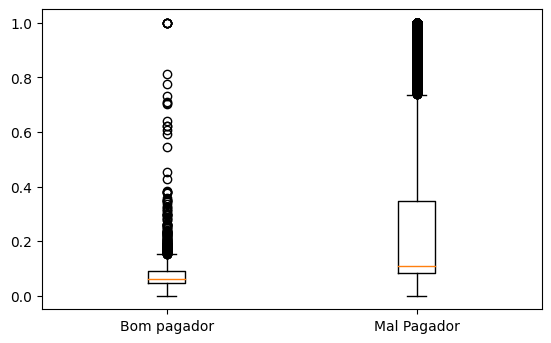

In [13]:
df = pd.DataFrame([(x,y[0]) for x,y in zip(y_test, y_pred_prob)], columns=['real', 'pred'])

homens_pred = df[df['real']==0]['pred']
mulheres_pred = df[df['real']==1]['pred']

preds = [homens_pred, mulheres_pred]
# Creating axes instance
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(preds)
ax.set_xticklabels(['Bom pagador','Mal Pagador'])
 
# show plot
plt.show()

In [17]:
y_pred = list(map(lambda x: (x[0]>0.5)*1, y_pred_prob))
report = classification_report(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

In [18]:
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    163990
           1       0.99      0.21      0.35     13486

    accuracy                           0.94    177476
   macro avg       0.97      0.61      0.66    177476
weighted avg       0.94      0.94      0.92    177476



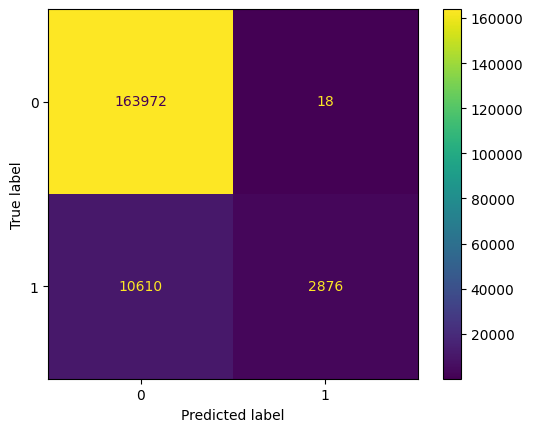

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])

disp.plot()
plt.show()

### Conclusão

O modelo sem nenhum tratamento de balanceamento de dados e que a métrica de treinamento na acurácia é um modelo ruim
para o objetivo principal, que seria de identificar os maus pagadores.
A métrica que temos que tomar como base seria o recall dos maus pagadores, aonde olhariamos os pagadores que foram classificados 
como bons mas na verdade são maus pagadores, pois do ponto de vista bancário, o banco não quer perder
dinheiro dando empréstimo para quem não vai pagá-lo.

### Modelo usando os Falsos Negativos como métrica e os dados desbalanceados

In [39]:
model_FN = tf.keras.Sequential(camadas)
model_FN.compile(loss='binary_crossentropy', optimizer='adam', metrics=tf.keras.metrics.FalseNegatives())
history_FN = model_FN.fit(X_train, y_train, 
                                      epochs=epochs, batch_size=batch_size, 
                                      validation_split=validation_split)

model_FN.save("./models/model_FN.keras")

c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/5
9983/9983 [==============================] - 27s 3ms/step - loss: 0.1965 - false_negatives: 34605.0000 - val_loss: 0.1914 - val_false_negatives: 3808.0000
Epoch 2/5
9983/9983 [==============================] - 25s 3ms/step - loss: 0.1958 - false_negatives: 34408.0000 - val_loss: 0.1853 - val_false_negatives: 3662.0000
Epoch 3/5
9983/9983 [==============================] - 24s 2ms/step - loss: 0.1953 - false_negatives: 34391.0000 - val_loss: 0.1858 - val_false_negatives: 3628.0000
Epoch 4/5
9983/9983 [==============================] - 24s 2ms/step - loss: 0.1952 - false_negatives: 34268.0000 - val_loss: 0.2028 - val_false_negatives: 3621.0000
Epoch 5/5
9983/9983 [==============================] - 24s 2ms/step - loss: 0.2017 - false_negatives: 34518.0000 - val_loss: 0.1923 - val_false_negatives: 3709.0000


In [19]:
model_FN = tf.keras.models.load_model("./models/model_FN.keras")

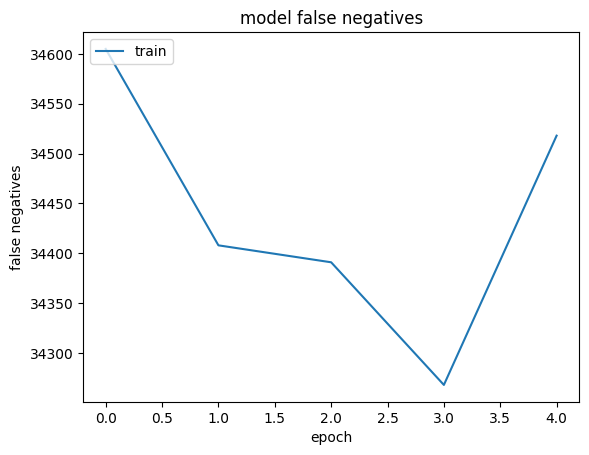

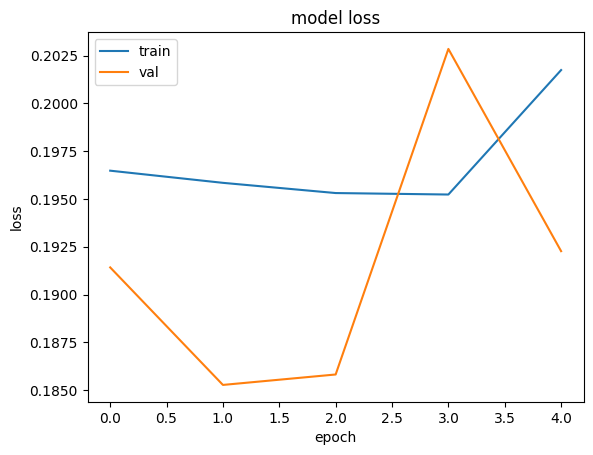

In [42]:
plt.plot(history_FN.history['false_negatives'])
#plt.plot(history_FN.history['val_false_negatives'])
plt.title('model false negatives')
plt.ylabel('false negatives')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_FN.history['loss'])
plt.plot(history_FN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
y_pred_prob_FN = model_FN.predict(X_test)

5547/5547 [==============================] - 5s 847us/step


In [22]:
y_pred = list(map(lambda x: (x[0]>0.5)*1, y_pred_prob_FN))
report = classification_report(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

In [23]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163990
           1       1.00      0.31      0.47     13486

    accuracy                           0.95    177476
   macro avg       0.97      0.65      0.72    177476
weighted avg       0.95      0.95      0.93    177476



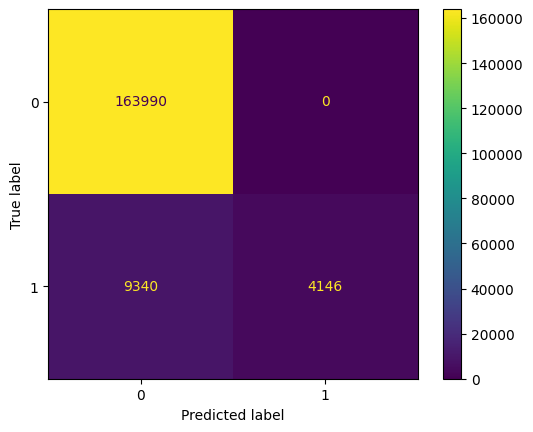

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])

disp.plot()
plt.show()

### Conclusão

O modelo apresentou uma leve melhora em suas métricas mas o recall da classe 1, que a classe em questão mais importante ainda
permanece ruim.

## Modelo que sofreu algum balanceamento no treinamento

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

sm = SMOTE(random_state = 2)
nr = NearMiss()

X_train_oversamp, y_train_oversamp = sm.fit_resample(X_train, y_train.ravel())
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [26]:
model_oversamp = tf.keras.Sequential(camadas)
model_oversamp.compile(loss='binary_crossentropy', optimizer='adam', metrics=tf.keras.metrics.FalseNegatives())
history_oversamp = model_oversamp.fit(X_train_oversamp, y_train_oversamp, 
                                      epochs=epochs, batch_size=batch_size, 
                                      validation_split=validation_split)

model_oversamp.save("./models/model_oversamp.keras")

Epoch 1/5
18449/18449 [==============================] - 54s 3ms/step - loss: 0.4847 - false_negatives: 216642.0000 - val_loss: 0.5172 - val_false_negatives: 38019.0000
Epoch 2/5
18449/18449 [==============================] - 54s 3ms/step - loss: 0.4516 - false_negatives: 188661.0000 - val_loss: 0.3840 - val_false_negatives: 9738.0000
Epoch 3/5
18449/18449 [==============================] - 52s 3ms/step - loss: 0.4426 - false_negatives: 179122.0000 - val_loss: 0.4075 - val_false_negatives: 5552.0000
Epoch 4/5
18449/18449 [==============================] - 50s 3ms/step - loss: 0.4365 - false_negatives: 169548.0000 - val_loss: 0.4171 - val_false_negatives: 22051.0000
Epoch 5/5
18449/18449 [==============================] - 52s 3ms/step - loss: 0.4329 - false_negatives: 165766.0000 - val_loss: 0.3505 - val_false_negatives: 7516.0000


In [28]:
model_miss = tf.keras.Sequential(camadas)
model_miss.compile(loss='binary_crossentropy', optimizer='adam', metrics=tf.keras.metrics.FalseNegatives())
history_miss = model_miss.fit(X_train_miss, y_train_miss, 
                                      epochs=epochs, batch_size=batch_size, 
                                      validation_split=validation_split)

model_miss.save("./models/model_miss.keras")

Epoch 1/5
1518/1518 [==============================] - 6s 3ms/step - loss: 0.4137 - false_negatives_1: 12941.0000 - val_loss: 0.3837 - val_false_negatives_1: 2297.0000
Epoch 2/5
1518/1518 [==============================] - 4s 3ms/step - loss: 0.3959 - false_negatives_1: 12736.0000 - val_loss: 0.3972 - val_false_negatives_1: 2744.0000
Epoch 3/5
1518/1518 [==============================] - 4s 3ms/step - loss: 0.3942 - false_negatives_1: 12909.0000 - val_loss: 0.4598 - val_false_negatives_1: 2688.0000
Epoch 4/5
1518/1518 [==============================] - 4s 3ms/step - loss: 0.3980 - false_negatives_1: 12657.0000 - val_loss: 0.5430 - val_false_negatives_1: 3268.0000
Epoch 5/5
1518/1518 [==============================] - 4s 3ms/step - loss: 0.3950 - false_negatives_1: 12607.0000 - val_loss: 0.5204 - val_false_negatives_1: 3227.0000


In [29]:
model_oversamp = tf.keras.models.load_model("./models/model_oversamp.keras")
model_miss = tf.keras.models.load_model("./models/model_miss.keras")

In [36]:
y_pred_prob_oversamp = model_oversamp.predict(X_test)
y_pred_prob_miss = model_miss.predict(X_test)

5547/5547 [==============================] - 5s 887us/step


### Oversampling

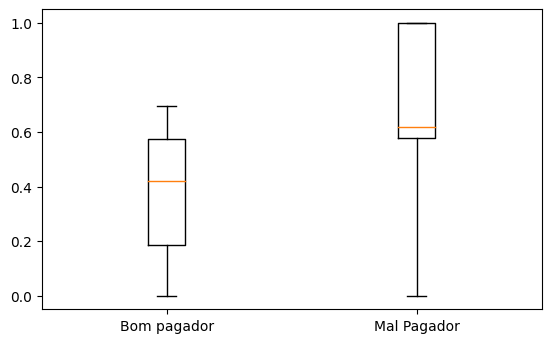

In [37]:
df = pd.DataFrame([(x,y[0]) for x,y in zip(y_test, y_pred_prob_oversamp)], columns=['real', 'pred'])

homens_pred = df[df['real']==0]['pred']
mulheres_pred = df[df['real']==1]['pred']

preds = [homens_pred, mulheres_pred]
# Creating axes instance
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(preds)
ax.set_xticklabels(['Bom pagador','Mal Pagador'])
 
# show plot
plt.show()

In [38]:
y_pred = list(map(lambda x: (x[0]>0.5)*1, y_pred_prob_oversamp))
report = classification_report(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.59      0.73    163990
           1       0.15      0.89      0.26     13486

    accuracy                           0.61    177476
   macro avg       0.57      0.74      0.50    177476
weighted avg       0.92      0.61      0.70    177476



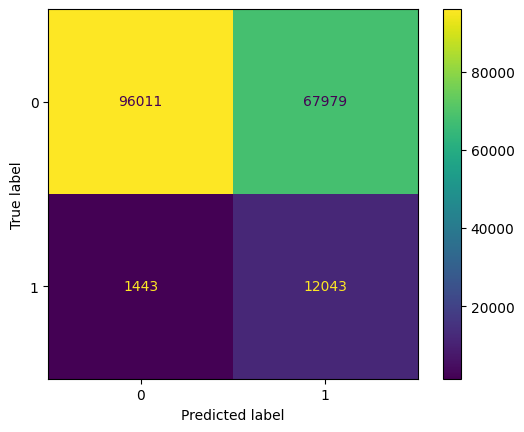

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])

disp.plot()
plt.show()

O modelo que sofreu do oversampling em seus dados de treinamento apresentou uma melhora evidente no recall da classe 1, mas em
contrapartida o modelo perdeu precisão nessa mesma classe.

### Undersampling

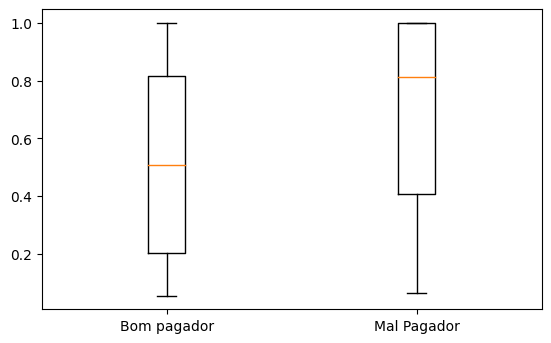

In [41]:
df = pd.DataFrame([(x,y[0]) for x,y in zip(y_test, y_pred_prob_miss)], columns=['real', 'pred'])

homens_pred = df[df['real']==0]['pred']
mulheres_pred = df[df['real']==1]['pred']

preds = [homens_pred, mulheres_pred]
# Creating axes instance
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(preds)
ax.set_xticklabels(['Bom pagador','Mal Pagador'])
 
# show plot
plt.show()

In [44]:
y_pred = list(map(lambda x: (x[0]>0.5)*1, y_pred_prob_miss))
report = classification_report(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.50      0.65    163990
           1       0.10      0.69      0.18     13486

    accuracy                           0.51    177476
   macro avg       0.53      0.59      0.41    177476
weighted avg       0.89      0.51      0.62    177476



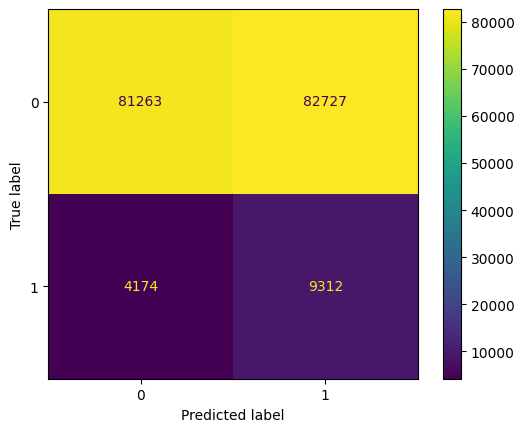

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])

disp.plot()
plt.show()

O modelo que sofreu do undersampling em seus dados de treinamento é melhor que o modelo que utiliza a métrica de acurácia no treinamento mas é pior que o que sofreu o oversampling. Em geral não se usa esse tratamento para o desbalanceamento dos dados.

## Modelo desbalanceado que sofreu poderamento nas classes

In [48]:
from sklearn.utils import class_weight

class_weight_values = class_weight.compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weight = {0:class_weight_values[0], 1:class_weight_values[1]}
class_weight

{0: 0.5411175986340631, 1: 6.580121609847431}

In [49]:
model_weight = tf.keras.Sequential(camadas)
model_weight.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.FalseNegatives()])
history_weight = model_weight.fit(X_train, y_train, 
                                      epochs=epochs, batch_size=batch_size, 
                                      validation_split=validation_split, class_weight=class_weight)

model_weight.save("./models/model_weight.keras")

Epoch 1/5


c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9983/9983 [==============================] - 24s 2ms/step - loss: 0.5156 - false_negatives_2: 18036.0000 - val_loss: 0.4977 - val_false_negatives_2: 1073.0000
Epoch 2/5
9983/9983 [==============================] - 26s 3ms/step - loss: 0.4906 - false_negatives_2: 15797.0000 - val_loss: 0.6201 - val_false_negatives_2: 172.0000
Epoch 3/5
9983/9983 [==============================] - 23s 2ms/step - loss: 0.4857 - false_negatives_2: 14475.0000 - val_loss: 0.4550 - val_false_negatives_2: 1095.0000
Epoch 4/5
9983/9983 [==============================] - 23s 2ms/step - loss: 0.4829 - false_negatives_2: 14276.0000 - val_loss: 0.4106 - val_false_negatives_2: 1374.0000
Epoch 5/5
9983/9983 [==============================] - 23s 2ms/step - loss: 0.4822 - false_negatives_2: 12958.0000 - val_loss: 0.4488 - val_false_negatives_2: 972.0000


In [50]:
model_weight = tf.keras.models.load_model("./models/model_weight.keras")

In [51]:
y_pred_prob_weight = model_weight.predict(X_test)

5547/5547 [==============================] - 5s 901us/step


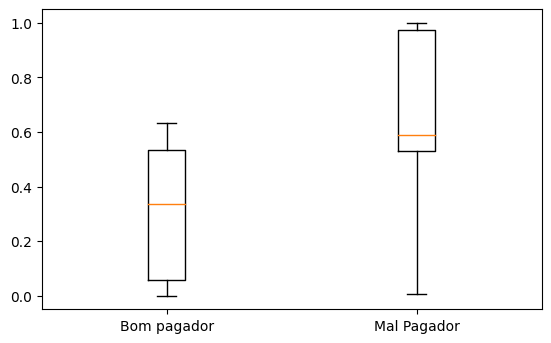

In [52]:
df = pd.DataFrame([(x,y[0]) for x,y in zip(y_test, y_pred_prob_weight)], columns=['real', 'pred'])

homens_pred = df[df['real']==0]['pred']
mulheres_pred = df[df['real']==1]['pred']

preds = [homens_pred, mulheres_pred]
# Creating axes instance
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(preds)
ax.set_xticklabels(['Bom pagador','Mal Pagador'])
 
# show plot
plt.show()

In [53]:
y_pred = list(map(lambda x: (x[0]>0.5)*1, y_pred_prob_weight))
report = classification_report(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

In [54]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.68      0.80    163990
           1       0.17      0.81      0.29     13486

    accuracy                           0.69    177476
   macro avg       0.58      0.75      0.55    177476
weighted avg       0.92      0.69      0.76    177476



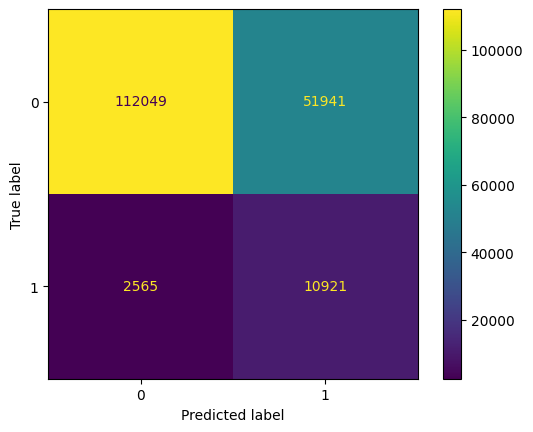

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])

disp.plot()
plt.show()

Olhando para a métrica que estamos interessados que é o recall, esse modelo, fazendo a média dos recalls de ambas as classes é o melhor(0.75 comparado com o recall do modelo que sofreu oversampling, que apresentou 0.74). Mas o recall da classe 1 perde para o modelo que sofreu oversampling(0.81 comparado com os 0.89 do modelo oversampling)

In [ ]:
import shap

# create a SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train[:100])

# explain the first test sample
sample = X_test[0:2]
shap_values = explainer.shap_values(sample)

# plot the SHAP values
# shap.summary_plot(shap_values, features=sample, feature_names=X_train.columns)

c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4/4 [==============================] - 0s 3ms/step


  0%|          | 0/2 [00:00<?, ?it/s]

6507/6507 [==============================] - 30s 5ms/step


 50%|█████     | 1/2 [00:37<00:37, 37.32s/it]

6507/6507 [==============================] - 31s 5ms/step


100%|██████████| 2/2 [01:12<00:00, 36.37s/it]


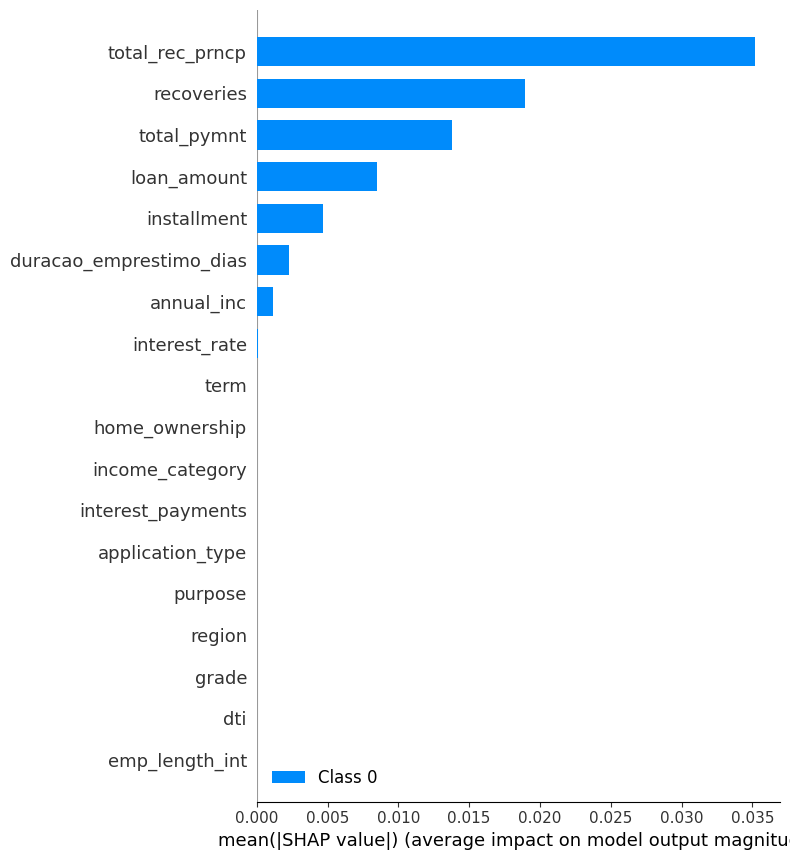

In [ ]:
# plot the SHAP values
shap.summary_plot(shap_values, features=sample, feature_names=X_train.columns)